# Model for Sample I: Wine and Whiskey

-------------


# Introduction

---------

This data pipeline and model starts with the data that was generated from the last notebook. The data had to be saved into an np array and exported. The X file, which contains the images is quite large, almost 3GB. Because of issues with the categorical method when they were exported, I needed to reupload the y-values (which are in the y_fixed methods notebooks).

I use was a Convoluted Neural Network to classify the pictures. I ran two different models to investigate how different topologies could effect classification. 

The five items selected for the set are: 

- Whiskey  
- Red Wine
- White Wine
- Rose
- Champagne

This sample of items are all very similar, and the goal was to see how well the model could do at discerning between like-items. 

The same models and pipelines are replicated for five different objects in the Mixed Bag Model. 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

import tensorflow as tf

import time
import threading

import numpy as np

Using TensorFlow backend.


## Importing Data and Restructuring to load into Keras CNN Model

--------

I picked the category ID's for the items I was looking to classify. These were explored in the EDA notebook. I then encoded the targets to simplify. 

In [2]:
targets = [1000003437, 1000003407, 1000003400, 1000003404, 1000003402]
label_encoder = LabelEncoder()
label_encoder.fit(targets)

LabelEncoder()

These are the files to import the data created in the other notebook. This drastically helped reduce the time it took to compute. Now instead of having to run my parsing method for two to three hours, I was able to quickly upload these large files as np.arrays to load into the CNN model. I then checked the shapes to verify the correct models were selected and could be loaded into the models.


In [3]:
with open('wine_Xtrain.npy', 'rb') as np_in:
    Xread= np.load(np_in)

In [4]:
Xread.shape

(6660, 180, 180, 3)

In [5]:
with open('wine_final_ytrain.npy', 'rb') as np_yin:
    Yread= np.load(np_yin)

In [6]:
Yread.shape

(6660,)

In [7]:
Yread_en = label_encoder.transform(Yread)

In [8]:
X = Xread
y= Yread_en

In [9]:
y_cat = to_categorical(y)

In [10]:
y_cat.shape

(6660, 5)

## Test Train Split

-----


In [11]:
# Update the train-test-split size 

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, random_state=2003)

X_train = X_train.reshape(X_train.shape[0], 180, 180, 3)
X_test = X_test.reshape(X_test.shape[0], 180, 180, 3)



## First Model 

---------

This is my first model. I sought to have a "simple" topology to test a neural net. Given the size of of dataset, even the reduced size of 7916 images each were run through 914,005 parameters during the testing. As such the modely typically took 5 minutes per epoch. 

In [12]:
# Model_1

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16, (4,4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 4995 samples, validate on 1665 samples
Epoch 1/5
4995/4995 [==============================] - 211s 42ms/step - loss: 0.8638 - acc: 0.6893 - val_loss: 0.6372 - val_acc: 0.7688
Epoch 2/5
4995/4995 [==============================] - 201s 40ms/step - loss: 0.5089 - acc: 0.8224 - val_loss: 0.5447 - val_acc: 0.8138
Epoch 3/5
4995/4995 [==============================] - 197s 39ms/step - loss: 0.3645 - acc: 0.8731 - val_loss: 0.5038 - val_acc: 0.8234
Epoch 4/5
4995/4995 [==============================] - 195s 39ms/step - loss: 0.2722 - acc: 0.9083 - val_loss: 0.5379 - val_acc: 0.8318
Epoch 5/5
4995/4995 [==============================] - 194s 39ms/step - loss: 0.1866 - acc: 0.9399 - val_loss: 0.6616 - val_acc: 0.8270


In [13]:
keras.callbacks.History()

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 176, 176, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                903200    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total para

The following two graphs show the relationship between the accuracy of the model and the loss between the training and testing data. This is a good way to see if the model is overfitting and how well it is at reducing the loss. 

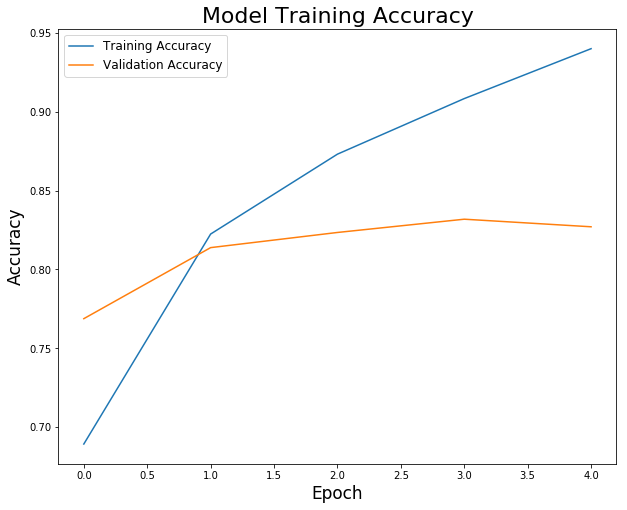

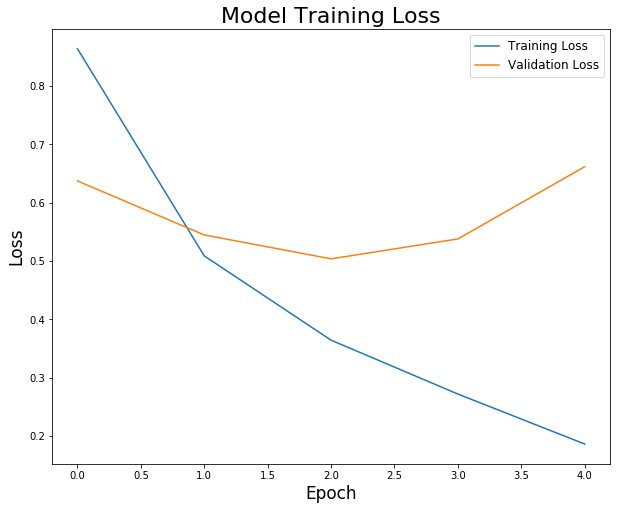

In [15]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

## Import Testing Data


In [16]:
# Import the Testing Data
with open('wine_Xtest.npy', 'rb') as np_in_test:
    Xt_in= np.load(np_in_test)


In [17]:
Xt_in.shape

(1256, 180, 180, 3)

In [18]:
with open('wine_final_ytest.npy', 'rb') as np_in_ytest_fixed:
    yt_fixed = np.load(np_in_ytest_fixed)

In [19]:
yt_fixed

array([1000003437, 1000003437, 1000003402, ..., 1000003400, 1000003402,
       1000003400])

In [20]:
yt_fixed.shape

(1256,)

In [21]:
yt_en = label_encoder.transform(yt_fixed)

In [22]:
yt_en

array([4, 4, 1, ..., 0, 1, 0])

In [23]:
yt_cats = to_categorical(yt_en)

In [24]:
yt_cats

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [25]:
yt_cats.shape

(1256, 5)

In [26]:
Xt = Xt_in


In [27]:
Xt.shape

(1256, 180, 180, 3)

Fitting first model with whole dataset and running 5 more epochs. 

In [28]:
model.fit(X, y_cat, validation_data=(Xt, yt_cats), epochs=5)

Train on 6660 samples, validate on 1256 samples
Epoch 1/5
6660/6660 [==============================] - 276s 41ms/step - loss: 0.2685 - acc: 0.9177 - val_loss: 0.4783 - val_acc: 0.8511
Epoch 2/5
6660/6660 [==============================] - 260s 39ms/step - loss: 0.1640 - acc: 0.9489 - val_loss: 0.8827 - val_acc: 0.8073
Epoch 3/5
6660/6660 [==============================] - 247s 37ms/step - loss: 0.1973 - acc: 0.9377 - val_loss: 0.5571 - val_acc: 0.8559
Epoch 4/5
6660/6660 [==============================] - 245s 37ms/step - loss: 0.1077 - acc: 0.9665 - val_loss: 0.5804 - val_acc: 0.8535
Epoch 5/5
6660/6660 [==============================] - 245s 37ms/step - loss: 0.0817 - acc: 0.9745 - val_loss: 0.6802 - val_acc: 0.8487


These are the same plots from earlier comparing the loss and accuracy, but with the updated history from running the model with the complete dataset. 

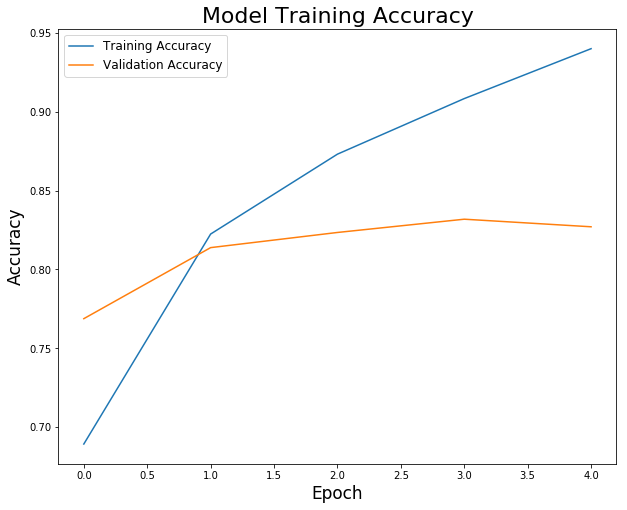

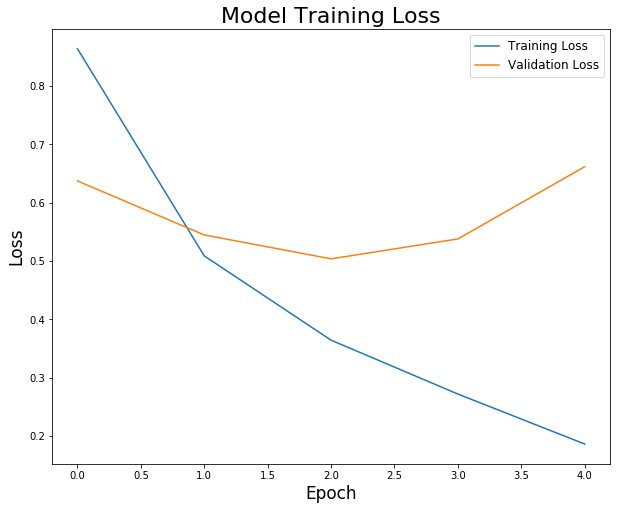

In [29]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

## Predictions 

--------

The model had a 84.87% accuracy on the validation data. Which is good and a noticeable pick-up over the baseline, going to show how good CNN models are at image recognition. 


In [30]:
model_1_preds = model.predict_classes(Xt, 32, verbose=1)

1256/1256 [==============================] - 20s 16ms/step


In [31]:
pd.DataFrame(confusion_matrix(yt_en, model_1_preds),
             columns=targets, index=["Whiskey (-3437)", "Red Wine (-3400)",
                                     "White Wine(-3402)", "Rose (-3404)",
                                     "Champange (-3407)"]).apply(lambda x: x/x.sum(),axis=1)

,1000003437,1000003407,1000003400,1000003404,1000003402
Whiskey (-3437),0.931373,0.039216,0.004202,0.014006,0.011204
Red Wine (-3400),0.122642,0.773585,0.033019,0.037736,0.033019
White Wine(-3402),0.246154,0.123077,0.492308,0.076923,0.061538
Rose (-3404),0.106870,0.083969,0.015267,0.740458,0.053435
Champange (-3407),0.067164,0.052239,0.014925,0.059701,0.805970


Looking to the individual categories, the model did best identifying the whiskey bottles. Intuitively this makes sense, as the whiskey bottles shape, color, and labeling are more distinct than the different wine bottles. The model did the worst job at identifying white wine bottles, at only 49% correct. Where it made misclassifictions with white wine it was skewed towards the whiskey bottles. 

## Second Model

For this step I created a second model with an extra level of complexity. I experimented with a topology using multiples of 16. This decision was arbitrary but it allowed for a clean feed through of the data as the size of the images changed with each pass through the neural network. 


In [32]:
# Import Model II Stuff 

model2 = Sequential()
model2.add(Conv2D(16, (2, 2), input_shape=(180, 180, 3), activation='relu'))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(32, (4,4), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(64, (4,4), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(y_cat.shape[1], activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 4995 samples, validate on 1665 samples
Epoch 1/5
4995/4995 [==============================] - 158s 32ms/step - loss: 0.8851 - acc: 0.6747 - val_loss: 0.6642 - val_acc: 0.7520
Epoch 2/5
4995/4995 [==============================] - 305s 61ms/step - loss: 0.5561 - acc: 0.8044 - val_loss: 0.5511 - val_acc: 0.8072
Epoch 3/5
4995/4995 [==============================] - 135s 27ms/step - loss: 0.4283 - acc: 0.8515 - val_loss: 0.5133 - val_acc: 0.8156
Epoch 4/5
4995/4995 [==============================] - 135s 27ms/step - loss: 0.3468 - acc: 0.8847 - val_loss: 0.5164 - val_acc: 0.8318
Epoch 5/5
4995/4995 [==============================] - 135s 27ms/step - loss: 0.2852 - acc: 0.9037 - val_loss: 0.5340 - val_acc: 0.8354


In [33]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 179, 179, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 86, 86, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
__________

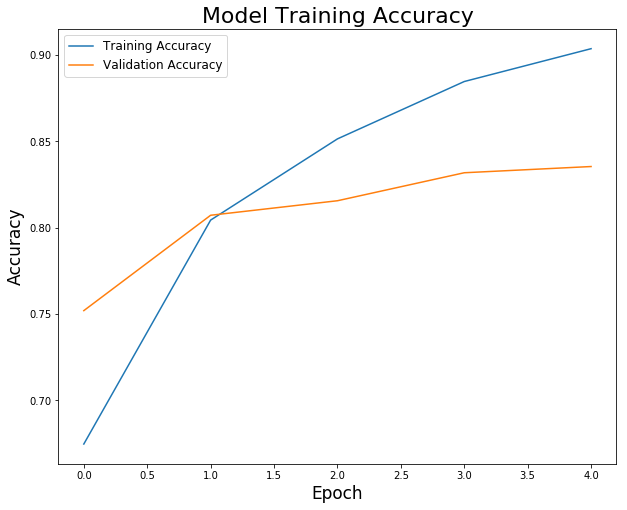

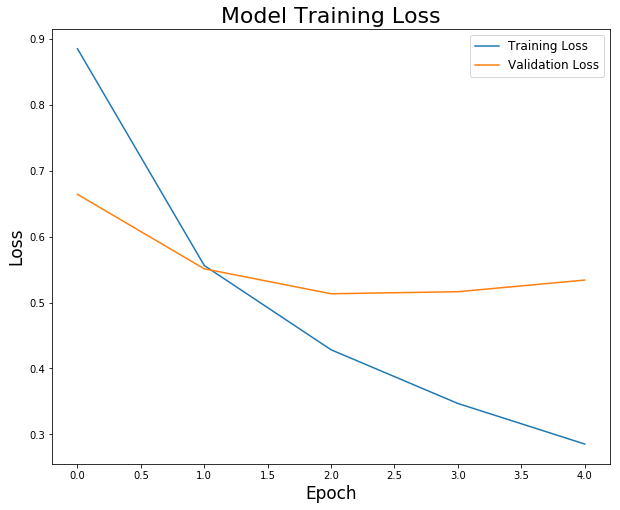

In [34]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

Running the second model with the full data set 

In [35]:
model2.fit(X, y_cat, validation_data=(Xt, yt_cats), epochs=5)

Train on 6660 samples, validate on 1256 samples
Epoch 1/5
6660/6660 [==============================] - 203s 31ms/step - loss: 0.3074 - acc: 0.8983 - val_loss: 0.4679 - val_acc: 0.8487
Epoch 2/5
6660/6660 [==============================] - 176s 26ms/step - loss: 0.2254 - acc: 0.9216 - val_loss: 0.4603 - val_acc: 0.8694
Epoch 3/5
6660/6660 [==============================] - 180s 27ms/step - loss: 0.1776 - acc: 0.9390 - val_loss: 0.5499 - val_acc: 0.8678
Epoch 4/5
6660/6660 [==============================] - 171s 26ms/step - loss: 0.1418 - acc: 0.9527 - val_loss: 0.5553 - val_acc: 0.8694
Epoch 5/5
6660/6660 [==============================] - 182s 27ms/step - loss: 0.1149 - acc: 0.9586 - val_loss: 0.5729 - val_acc: 0.8646


Updated Graphs after the final run of the second model. 

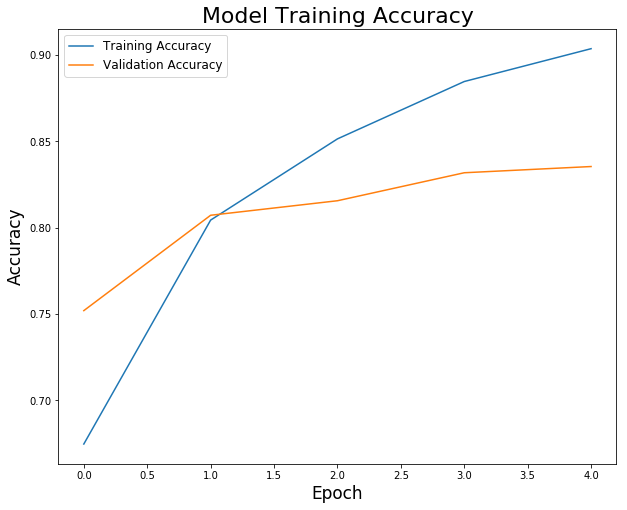

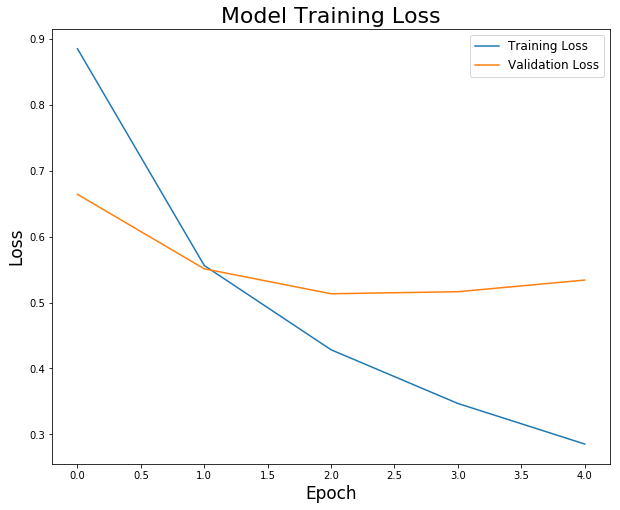

In [36]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

## Predictions

-------

The second model correctly predicted 86.46% of the images in the dataset. The added layer of features and topology of 16, 32, 64 was slightly more effective than the original model (If there was enough computing power to generate more samples of these two, it would make for an interesting hypothesis testing experiment and could be used to help tune other, more complex neural nets). 



In [37]:
#Build predictions
model_2_preds = model2.predict_classes(Xt, 32, verbose=1)

1256/1256 [==============================] - 13s 11ms/step


In [38]:
pd.DataFrame(confusion_matrix(yt_en, model_2_preds),
             columns=targets, index=["Whiskey (-3437)", "Red Wine (-3400)",
                                     "White Wine(-3402)", "Rose (-3404)",
                                     "Champange (-3407)"]).apply(lambda x: x/x.sum(),axis=1)

,1000003437,1000003407,1000003400,1000003404,1000003402
Whiskey (-3437),0.925770,0.025210,0.014006,0.029412,0.005602
Red Wine (-3400),0.084906,0.768868,0.047170,0.075472,0.023585
White Wine(-3402),0.123077,0.061538,0.676923,0.107692,0.030769
Rose (-3404),0.022901,0.022901,0.045802,0.862595,0.045802
Champange (-3407),0.052239,0.022388,0.022388,0.119403,0.783582


Evaluating the predictions, whiskey bottles were the easiast for the model to correctly identify, and white wine the most challenging. Suprisingly this model was much better at classifying the white wine bottles than the first model (67% versus 49%).